#Transition path theory tests
In what follows we are going to look at a simple four state model to better understand some fundamental results of transition path theory. The essential reference for this work is a paper by Berezhkovskii, Hummer and Szabo [(*J. Chem. Phys.*, 2009)](http://dx.doi.org/10.1063/1.3139063). However, there are other important references for alternative formulations of the same results, by Vanden Eijnden et al ([*J. Stat. Phys.*, 2006](http://dx.doi.org/10.1007/s10955-005-9003-9), [*Multiscale Model. Simul.*,2009](http://dx.doi.org/10.1137/070699500) and [*Proc. Natl. Acad. Sci. U.S.A.*, 2009](http://dx.doi.org/10.1073/pnas.0905466106)).

###Model system
Here we focus in a simple four state model described in the Berezhkovskii-Hummer-Szabo (BHS) paper. It consists of two end states (folded, $F$, and unfolded, $U$), connected by two intermediates $I_1$ and $I_2$. In particular, we define an instance of this simple model in order to get some numerical results. Below we show a graph representation of the model taken directly from the BHS paper (Figure 2).

<img src="files/fourstate.png">

The model is itself described in the ```Fourstate``` class of the ```fourstate``` module. So first of all we create an instance of that class:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import fourstate
import itertools
import networkx as nx
import numpy as np
import operator
bhs = fourstate.FourState()


 count matrix:
[[468324    832    470      0]
 [   832 120096    350     52]
 [   470    350  92721   1831]
 [     0     52   1831 636804]]

 transition matrix:
[[  9.97227581e-01   6.85733125e-03   4.92807113e-03   0.00000000e+00]
 [  1.77162253e-03   9.89829391e-01   3.66984020e-03   8.14170321e-05]
 [  1.00079638e-03   2.88469463e-03   9.72203582e-01   2.86681896e-03]
 [  0.00000000e+00   4.28583203e-04   1.91985069e-02   9.97051764e-01]]

 rate:
[[ -2.77241890e-03   6.85733125e-03   4.92807113e-03   0.00000000e+00]
 [  1.77162253e-03  -1.01706091e-02   3.66984020e-03   8.14170321e-05]
 [  1.00079638e-03   2.88469463e-03  -2.77964182e-02   2.86681896e-03]
 [  0.00000000e+00   4.28583203e-04   1.91985069e-02  -2.94823599e-03]]

 equilibrium probabilities:
[ 0.3544307   0.09156877  0.07197805  0.48202247]

 eigenvalues:
[  6.57711856e-19  -1.89528180e-03  -1.13818135e-02  -3.04105869e-02]


By doing this we get a few variables initialized. First, a symmetric transition count matrix, $\mathbf{N}$, where we see that the most frequent transitions are those within metastable states (corresponding to the terms in the diagonal $N_{ii}$). Non-diagonal transitions are much less frequent (i.e. $N_{ij}<<N_{ii}$ for all $i\neq j$). 

Then we get the transition matrix $\mathbf{T}$, whose diagonal elements are close to 1, as corresponds to a system with high metastability (i.e. high probability of the system remaining where it was). We can also construct a rate matrix, $\mathbf{K}$. From it we obtain eigenvalues ($\lambda_i$) and corresponding eigenvectors ($\Psi_i$). The latter allow for estimating equilibrium probabilities (note that $U$ and $F$ have the largest populations). 

The eigenvalues are sorted by value, with the first eigenvalue ($\lambda_0$) being zero, as corresponds to a system with a unique stationary distribution. All other eigenvalues are negative, and they are characteristic of a two-state like system as there is a considerable time-scale separation between the slowest mode ($\lambda_1$, corresponding to a relaxation time of $\tau_1=-1/\lambda_1$) and the other two ($\lambda_2$ and $\lambda_3$), as shown below.

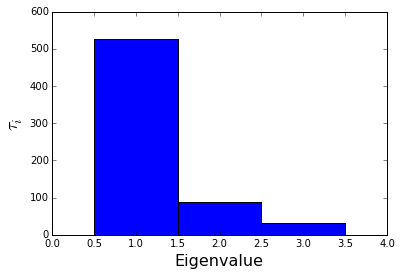

In [2]:
fig, ax = plt.subplots()
ax.bar([0.5,1.5,2.5], -1./bhs.evals[1:], width=1)
ax.set_xlabel(r'Eigenvalue', fontsize=16)
ax.set_ylabel(r'$\tau_i$', fontsize=18)
ax.set_xlim([0,4])
plt.show()

###Committors and fluxes
Next we calculate the committors and fluxes for this four state model. For this we define two end states, so that we estimate the flux between folded ($F$) and unfolded ($U$). The values of the committor or $p_{fold}$ are defined to be 1 and 0 for $U$ and $F$, respectively, and using the Berezhkovskii-Hummer-Szabo (BHS) method we calculate the committors for the rest of the states.

In [3]:
bhs.run_commit()


 pfold values:
[ 0.          0.24729852  0.72333251  1.        ]

 flux :
[[ -0.00000000e+00  -1.55283051e-04  -2.56575420e-04  -0.00000000e+00]
 [  1.55283051e-04  -0.00000000e+00  -1.25743403e-04  -2.95396480e-05]
 [  2.56575420e-04   1.25743403e-04  -0.00000000e+00  -3.82318823e-04]
 [  0.00000000e+00   2.95396480e-05   3.82318823e-04  -0.00000000e+00]]

 reactive flux: 0.000411858


We also obtain the flux matrix, $\mathbf{J}$, containing local fluxes ($J_{ji}=J_{i\rightarrow j}$) for the different edges in the network. The signs represent the direction of the transition: positive for those fluxes going from low to high $p_{fold}$ and negative for those going from high to low $p_{fold}$. For example, for intermediate $I_1$ (second column) we see that the transitions to $I_2$ and $F$ have a positive flux (i.e. flux goes from low to high $p_{fold}$).

A property of flux conservation that must be fulfilled is that the flux into one state is the same as the flux out of that state, $J_j=\sum_{p_{fold}(i)<p_{fold}(j)}J_{i\rightarrow j}=\sum_{p_{fold}(i)>p_{fold}(j)}J_{j\rightarrow i}$. We check for this property for states $I_1$ and $I_2$.

In [4]:
print " j   J_j(<-)    J_j(->)"
print " -  --------   --------"
for i in [1,2]:
    print "%2i %10.4e %10.4e"%(i, np.sum([bhs.J[i,x] for x in range(4) if bhs.pfold[x] < bhs.pfold[i]]),\
                               np.sum([bhs.J[x,i] for x in range(4) if bhs.pfold[x] > bhs.pfold[i]]))

 j   J_j(<-)    J_j(->)
 -  --------   --------
 1 1.5528e-04 1.5528e-04
 2 3.8232e-04 3.8232e-04


###Paths through the network
Another important bit in transition path theory is the possibility of identifying paths through the network. The advantage of a simple case like the one we are looking at is that we can enumerate all those paths and check how much flux each of them carry. For example, the contribution of one given path $U\rightarrow I_1\rightarrow I_2\rightarrow F$ to the total flux is given by $J_{U\rightarrow I_1\rightarrow I_2\rightarrow F}=J_{U \rightarrow I_1}(J_{I_1 \rightarrow I_2}/J_{I_1})(J_{I_2 \rightarrow F}/J_{I_2})$.

In the BHS paper, simple rules are defined for calculating the length of a given edge in the network. These rules are implemented in the `gen_path_lengths` function. 

In [5]:
import tpt_functions
Jnode, Jpath = tpt_functions.gen_path_lengths(range(4), bhs.J, bhs.pfold, \
                                bhs.sum_flux, [3], [0])
JpathG = nx.DiGraph(Jpath.transpose())

print Jnode
print Jpath

[0.0, 0.00015528305100722236, 0.00038231882254262427, 0.00041185847059234789]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  9.75430186e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  4.73257118e-01   2.11006242e-01   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.65951623e+00   9.99999001e-10   0.00000000e+00]]


We can exhaustively enumerate the paths and check whether the fluxes add up to the total flux.

In [25]:
tot_flux = 0
paths = {}
k = 0
for path in nx.all_simple_paths(JpathG, 0, 3):
    paths[k] ={}
    paths[k]['path'] = path
    f = bhs.J[path[1],path[0]]
    print "%2i -> %2i: %10.4e "%(path[0], path[1], \
                bhs.J[path[1],path[0]])
    for i in range(2, len(path)):
        print "%2i -> %2i: %10.4e %10.4e"%(path[i-1], path[i], \
                bhs.J[path[i],path[i-1]], Jnode[path[i-1]])
        f *= bhs.J[path[i],path[i-1]]/Jnode[path[i-1]]
    tot_flux += f
    paths[k]['flux'] = f
    print "  J(path) = %10.4e"%f
    print
    k+=1
print " Commulative flux: %10.4e"%tot_flux


 0 ->  1: 1.5528e-04 
 1 ->  2: 1.2574e-04 1.5528e-04
 2 ->  3: 3.8232e-04 3.8232e-04
  J(path) = 1.2574e-04

 0 ->  1: 1.5528e-04 
 1 ->  3: 2.9540e-05 1.5528e-04
  J(path) = 2.9540e-05

 0 ->  2: 2.5658e-04 
 2 ->  3: 3.8232e-04 3.8232e-04
  J(path) = 2.5658e-04

 Commulative flux: 4.1186e-04
1 : [0, 2, 3] : flux = 0.000256575
2 : [0, 1, 2, 3] : flux = 0.000125743
3 : [0, 1, 3] : flux = 2.95396e-05


So indeed the cumulative flux is equal to the total flux we estimated before.
Below we print the sorted paths for furu

In [ ]:
sorted_paths = sorted(paths.items(), key=operator.itemgetter(1))
sorted_paths.reverse()
k = 1
for path in sorted_paths:
    print k, ':', path[1]['path'], ':', 'flux = %g'%path[1]['flux']
    k +=1

### Highest flux paths
One of the great things of using TPT is that it allows for visualizing the highest flux paths. In general we cannot just enumerate all the paths, so we resort to Dijkstra's algorithm to find the highest flux path. The problem with this is that the algorithm does not find the second highest flux path. So once identified, we must remove the flux from one path, so that the next highest flux path can be found by the algorithm. An algorithm for doing this was elegantly proposed by Metzner, Schütte and Vanden Eijnden. Now we implement it for the model system.

In [7]:
while True:
    Jnode, Jpath = tpt_functions.gen_path_lengths(range(4), bhs.J, bhs.pfold, \
                                     bhs.sum_flux, [3], [0])
    # generate nx graph from matrix
    JpathG = nx.DiGraph(Jpath.transpose())
    # find shortest path
    try:
        path = nx.dijkstra_path(JpathG, 0, 3)
        pathlength = nx.dijkstra_path_length(JpathG, 0, 3)
        print " shortest path:", path, pathlength
    except nx.NetworkXNoPath:
        print " No path for %g -> %g\n Stopping here"%(0, 3)
        break
    
    # calculate contribution to flux
    f = bhs.J[path[1],path[0]]
    print "%2i -> %2i: %10.4e "%(path[0], path[1], bhs.J[path[1],path[0]])
    path_fluxes = [f]
    for j in range(2, len(path)):
        i = j - 1
        print "%2i -> %2i: %10.4e %10.4e"%(path[i], path[j], \
            bhs.J[path[j],path[i]], \
            bhs.J[path[j],path[i]]/Jnode[path[i]])
        f *= bhs.J[path[j],path[i]]/Jnode[path[i]]
        path_fluxes.append(bhs.J[path[j],path[i]])

    # find bottleneck
    ib = np.argmin(path_fluxes)
    print "bottleneck: %2i -> %2i"%(path[ib],path[ib+1])
        
    # remove flux from edges
    for j in range(1,len(path)):
        i = j - 1
        bhs.J[path[j],path[i]] -= f
        
    # numerically there may be some leftover flux in bottleneck
    bhs.J[path[ib+1],path[ib]] = 0.
    
    bhs.sum_flux -= f
    print ' flux from path ', path, ': %10.4e'%f
    print ' fluxes', path_fluxes
    print ' leftover flux: %10.4e\n'%bhs.sum_flux

 shortest path: [0, 2, 3] 0.473257119492
 0 ->  2: 2.5658e-04 
 2 ->  3: 3.8232e-04 1.0000e+00
bottleneck:  0 ->  2
 flux from path  [0, 2, 3] : 2.5658e-04
 fluxes [0.00025657541958512542, 0.00038231882254262465]
 leftover flux: 1.5528e-04

 shortest path: [0, 1, 2, 3] 0.211006244058
 0 ->  1: 1.5528e-04 
 1 ->  2: 1.2574e-04 8.0977e-01
 2 ->  3: 1.2574e-04 1.0000e+00
bottleneck:  1 ->  2
 flux from path  [0, 1, 2, 3] : 1.2574e-04
 fluxes [0.00015528305100722236, 0.00012574340295749882, 0.00012574340295749901]
 leftover flux: 2.9540e-05

 shortest path: [0, 1, 3] 2.00000055511e-09
 0 ->  1: 2.9540e-05 
 1 ->  3: 2.9540e-05 1.0000e+00
bottleneck:  1 ->  3
 flux from path  [0, 1, 3] : 2.9540e-05
 fluxes [2.9539648049723343e-05, 2.9539648049723218e-05]
 leftover flux: 1.6941e-20

 No path for 0 -> 3
 Stopping here


So the algorithm works: we have been able to sort the paths based on the amount of flux going through them, which should allow for illustrating the maximum flux paths.